<a href="https://colab.research.google.com/github/Anny-Verly/Projeto-Python-MASL/blob/main/Caderno_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center>  </center>

# <center> Caderno 3
# <center> Respostas no Dom√≠nio do Tempo </center>

<p align="justify"> A resposta temporal de um sistema de controle consiste em duas parcelas, a saber: $transit√≥ria$ e $permanente$. A  resposta transit√≥ria √© aquela que vai do estado inicial ao final e a resposta permanente  √©  o comportamento do sistema na medida em que o tempo tende a infinito. Pode-se representar a resposta de um sistema de acordo com:
<a name="eq31"></a>
$$ y(t) = y_{tr}(t)+y_{ee}(t), $$
<p align ="right">(3.1)</p>

<p align="justify"> em que $y_{tr}(t)$ √© a resposta transit√≥ria ou natural, solu√ß√£o da EDO homog√™nea e $y_{ee}(t)$ √© a resposta em estado estacion√°rio, permanente, for√ßada ou solu√ß√£o particular. Com efeito, existem √≠ndices que podem ser utilizados para avaliar os desempenhos das duas parcelas da resposta temporal e, assim, o projetista pode verificar se essas fornecem o comportamento desejado.

<p align="justify">  Usualmente, fun√ß√µes matem√°ticas dos tipos $impulso$, $degrau$ e $rampa$ descrevem uma ampla faixa de sinais t√≠picos de entradas de sistemas de controle. Al√©m do mais, tais entradas s√£o utilizadas como padr√µes para a avalia√ß√£o das respostas temporais.

<p align="justify">  O presente caderno se dedica a apresentar algumas ferramentas em Python que podem ser utilizadas para obten√ß√£o de solu√ß√µes num√©ricas para sistema din√¢micos.



<a name="secao31"></a>
## 3.1 Solu√ß√µes Num√©ricas de Equa√ß√µes Diferenciais Ordin√°rias

<p align="justify"> As equa√ß√µes diferenciais ordin√°rias (EDO's) podem ser  classificadas quanto ao tipo, ordem, linearidade e parametriza√ß√£o. Este material aborda, principlamente, o estudo de sistemas lineares invariantes no tempo (SLIT), no entanto, como ser√° apresentado, algumas ferramentas de simula√ß√£o s√£o comuns a sistemas lineares e n√£o lineares.

Seja [(3.2)](#eq32) uma EDO linear de ordem $n$ [[9]](#ref9):

<a name="eq32"></a>

$$ f(t) = a_0(t)y+a_1(t)\frac{dy}{dt}+a_2(t)\frac{d^2y}{dt^2}+...++a_n(t)\frac{d^ny}{dt^n}, $$
<p align ="right">(3.2)</p>

 se os par√¢metros $a_0,  a_1, \dots ,  a_n$ forem constantes, ent√£o, se trata de um SLIT.

A solu√ß√£o de [(3.2)](#eq32) pode ser obtida numericamente por meio do comando $<odeint>$. Esta √∫ltima √© a uma fun√ß√£o pertencente ao *pacote Scipy.integrate* e integra numericamente EDO's  expl√≠citas definidas por $dy/dt = f(t, y)$. A chamada da fun√ß√£o √© feita da seguinte forma:

<center>

```
y = odeint(f, y0, t)
```

</center>

em que,
<p align="justify"> $\textbf{f}$ pode ser uma fun√ß√£o linear ou n√£o linear, e descreve as rela√ß√µes entre as vari√°veis do sistema por meio de uma equa√ß√£o diferencial de primeira ordem.

<p align="justify"> $\textbf{y0}$ √© o vetor de condi√ß√µes iniciais,

<p align="justify"> $\textbf{t}$ √© o vetor de tempo no qual a solu√ß√£o $y(t)$ √© estimada e

<p align="justify"> $\textbf{y}$ √© a matriz de vetores solu√ß√µes $y = [y(t(1)), y(t(2)), ...] \in \Re^{n \times dim[t]}$.




<a name="ex31"></a>

###Exemplo 3.1

<p align="justify"> Seja o comportamento de um sistema definido pela seguinte E.D.O:
<a name="eq33"></a>

$$ \frac{dy}{dt} = y^2 - y.sen(t) + cos(t),  y(0) = 0. $$
<p align ="right">(3.3)</p>

Para obter a solu√ß√£o num√©rica de [(3.3)](#eq33), deve-se, no primeiro momento, importar os $\textit{pacotes Numpy, Scipy e Matplotlib}$. O modelo, as condi√ß√µes iniciais e o vetor com os instantes de tempo s√£o utilizados como entradas de $<odeint>$ para calcular numericamente $y(t)$.


In [ ]:
import numpy as np                  # Biblioteca destinada a realizar opera√ß√µes em arrays
from scipy.integrate import odeint  # Odeint √© uma solu√ß√£o para problema de equa√ß√µes diferenciais
import matplotlib.pyplot as plt     # Respons√°vel pela cria√ß√£o de gr√°ficos est√°ticos ou din√¢micos de alta qualidade.
import math                         # Biblioteca que cont√©m constantes num√©ricas (œÄ = 3.141592‚Ä¶, e = 2.718281‚Ä¶, œÑ = 6.283185‚Ä¶) e fun√ß√µes trigonom√©tricas, logar√≠timicas, raizes, etc.


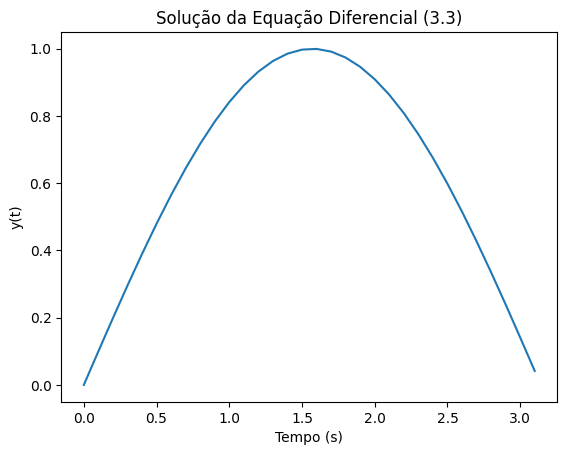

In [ ]:
# Definindo a equa√ß√£o diferencial
def f(y, t):
    return y**2-y*math.sin(t)+math.cos(t)

t=np.arange(0,math.pi,0.1)  # np.arange(start,stop,step, dtype=None)
y0 = 0  # Valor inicial de y

# Solu√ß√£o Num√©rica
y = odeint(f, y0, t)

# Plotando o gr√°fico da solu√ß√£o
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Solu√ß√£o da Equa√ß√£o Diferencial (3.3)')
plt.show()

<p align="right">   $\square$

<a name="ex32"></a>
###Exemplo 3.2

<p align="justify"> Deseja-se encontrar a evolu√ß√£o temporal da  tens√£o $V_{c}(t)$, indicada no circuito RLC s√©rie do Exemplo 2.1 (Caderno 2), cujo modelo √© dado por:

$$
 \begin{bmatrix}
  \dot{I_L}(t)  \\
  \dot{V_C}(t)  \\
 \end{bmatrix}
 =
 \begin{bmatrix}
  0 & -\frac{1}{L} \\
  \frac{1}{C} & -\frac{1}{RC}
 \end{bmatrix}
 .
 \begin{bmatrix}
  I_L(t) \\
  V_C(t)
\end{bmatrix}
 +
\begin{bmatrix}
\frac{1}{L} \\
  0
\end{bmatrix}
.
\begin{bmatrix}
V_{in}(t)
\end{bmatrix},
$$


$$
\begin{bmatrix}
V_{out}(t)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1
\end{bmatrix}
.
\begin{bmatrix}
  I_L(t)  \\
  V_C(t)  \\
\end{bmatrix},
$$
<p align="justify"> em que  $ V_{in}(t) = A.sen(2.\pi.f.t)$; $A = 1.0 V$ ; $f = 10^4 Hz$; $R = 10 \Omega $; $L = 10^{‚àí3} H$  e $C = 10^{‚àí6}F $.




In [ ]:
# Dados do problema:
A = 1.0
f = 1e+4
R = 10
L = 1e-3
C = 1e-6

# Fun√ß√£o do problema:
def RLC(y, t):
    z1 = y[0]
    z2 = y[1]
    Vin = A * math.sin(2.0 * math.pi * f * t)  # Entrada do sistema
    dz1dt = z2  # dVout/dt
    dz2dt = (Vin - z1 - (L * z2) / R) / (L * C)  # d2Vout/dt2
    dydt = [dz1dt,dz2dt]
    return dydt

t = np.linspace(0, 0.001, 1000)
# Condi√ß√µes iniciais
y0 = [0, 0]
# Solu√ß√£o da EDO do sistema
y = odeint(RLC, y0, t)

# Exibi√ß√£o dos resultados:
Vin = A * np.sin(2 * math.pi * f * t)
plt.plot(t, Vin,'--', label='$V_{in}$')
plt.plot(t, y[:, 0], label='$V_{out}$')
plt.xlabel('Tempo (s)')
plt.ylabel('$V_{out}(t)$')
plt.title('Circuito RLC')
plt.legend()
plt.show()


<p align="right">   $\square$

<a name="secao32"></a>
##3.2 Respostas Temporais Utilizando Fun√ß√£o de Transfer√™ncia e Matrizes de Estados
<p align="justify"> Quando se trata de representa√ß√µes de SLIT, como fun√ß√µes de trasfer√™ncia e espa√ßos de estados, existem alguns comandos em Python que fornecem repostas temporais devidas a sinais t√≠picos de entrada, como degrau e impulso:

<center>

```
step_response(SLIT,T,X0)
impulse_response(SLIT,T,X0)
```

</center>


<p align="justify"> em que os par√¢metros de entradas s√£o, respectivamente, sistema $\textit{SLIT}$, vetor de tempo $\textit{T}$ e condi√ß√µes iniciais $\textit{X0}$, sendo que os dois √∫ltimos s√£o opcionais. A fun√ß√£o retorna, ent√£o, um vetor com a resposta temporal da representa√ß√£o cont√≠nua no tempo.

<p align="justify"> H√°, ainda, a possibilidade de encontrar respostas temporais para outros tipos de fun√ß√µes matem√°ticas:

<center>

```
forced_response(SLIT, T, u, X0)

```

</center>

em que $u$ √© o vetor com os dados da fun√ß√£o de entrada.


<a name="ex33"></a>
###Exemplo 3.3

Sejam os modelos descritos por  ([3.4](#eq34))  e ([ 3.5](#eq35)), as respostas temporais √†s entradas em  degrau e rampa, para cada um desses, s√£o obtidas por meio da execu√ß√£o do algoritmo a seguir.

<a name="eq34"></a>
$$ G(s) = \frac{36}{s^2+3s+36} \\ $$
<p align ="right">(3.4)</p>

<a name="eq35"></a>
$$
x =
\begin{bmatrix}
0 & 3 & 1 \\
2 & 8 & 1 \\
-10 & -5 & -2\\
\end{bmatrix}
x+
\begin{bmatrix}
10\\
0\\
0
\end{bmatrix}
u\\
y =
\begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
x
$$
<p align ="right">(3.5)</p>

In [ ]:
pip install control

In [ ]:
import numpy as np                # Biblioteca destinada a realizar opera√ß√µes em arrays
import control as ctl             # Biblioteca que possui as opera√ß√µes t√≠picas de Sistemas de Controle
import matplotlib.pyplot as plt   # Respons√°vel pela cria√ß√£o de gr√°ficos est√°ticos ou din√¢micos de alta qualidade.
import math                # Biblioteca que cont√©m constantes num√©ricas (œÄ = 3.141592‚Ä¶, e = 2.718281‚Ä¶, œÑ = 6.283185‚Ä¶) e fun√ß√µes trigonom√©tricas, logar√≠timicas, raizes, etc.

In [ ]:
# Vari√°vel simb√≥lica
s = ctl.tf('s')
# Fun√ß√£o de Transfer√™ncia (3.4):
num = 36
den = s**2 + 3*s + 36
FT = num/den
# Modelo em EE (3.5):
A = [[-3, 1, 0] , [0, -6, 1] , [0, 0, -5]]
B = [[0], [1], [1]]
C = [0, 1, 1]
D = [0]
EE = ctl.StateSpace(A, B, C, D);

# Vetor tempo
time = np.linspace(0,5,5000)              # Cria um vetor que inicia em 0 e termina em 5 segundos num total de 5000 pontos.
time2 = np.linspace(0,2,5000)             # Cria um vetor que inicia em 0 e termina em 2 segundos num total de 5000 pontos.
# Respostas ao Degrau:
t1,y1 = ctl.step_response(FT,time)        # t1 e y1 correspondem aos pontos cujos resultados das resposta ao degrau do sistema ser√° dado no tempo e amplitude respectivamente.
t2,y2 = ctl.step_response(EE,time2)       # t2 e y2 correspondem aos pontos cujos resultados das resposta ao degrau do sistema ser√° dado no tempo e amplitude respectivamente.
# Respostas a Rampa:
y = time;
t3,y3 = ctl.forced_response(FT,time,y)    # t3 e y3 correspondem aos pontos cujos resultados das resposta a rampa para o sistema dado ser√° dado no tempo e amplitude respectivamente.
t4,y4 = ctl.forced_response(EE,time2,y)   # t4 e y4 correspondem aos pontos cujos resultados das resposta a rampa para o sistema dado ser√° dado no tempo e amplitude respectivamente.

#Exibi√ß√£o Gr√°fica das Respostas
plt.figure(figsize=(9,7))

plt.subplot(2,2,1);
plt.plot(t1,y1, color = 'green')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau de (3.4)')

plt.subplot(2,2,2);
plt.plot(t2,y2, color = 'blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau de (3.5)')

plt.subplot(2,2,3);
plt.plot(t3,y3, color = 'red')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta a Rampa de (3.4)')

plt.subplot(2,2,4);
plt.plot(t4,y4, color = 'black')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta a Rampa de (3.5)')

Text(0, 0.5, 'Resposta a Rampa de (3.5)')



<a name="ex34"></a>

###Exemplo 3.4 - Mudar exemplo

Deseja-se determinar a resposta temporal de ([3.4](#eq33)) para uma entrada do tipo:

<a name="eq36"></a>
$$ u(t) = sen(2\pi ft), $$
<p align ="right">(3.6)</p>
com $f=60 Hz$.


In [ ]:
# Fun√ß√£o de Transfer√™ncia G(s) - Sistema 1:
num = 36
den = s**2 + 3*s + 36
FT = num/den
# Senoide
f = 60                                    # Frequ√™ncia da senoide
t = np.linspace(0,1e-3,10001)             # N√∫mero de pontos da senoide que vai entre 0 a 1 ms num total de 10001 pontos
Senoide = np.sin(2*math.pi*f*t)           # Vetor que armazena a senoide em fun√ß√£o da frequ√™ncia e do tempo
t1,y1 = ctl.forced_response(FT,t,Senoide) # t1 e y1 correspondem aos pontos cujos resultados das resposta a entrada senoidal para o sistema dado ser√° dado no tempo e amplitude respectivamente.

#Plot
plt.plot(t1,y1)
plt.title('Resposta  de (3.4) a u(t)=sen(œât)')
plt.xlabel('Tempo (s)')
plt.ylabel('$y(t)$')
plt.show()

<p align="right">   $\square$

##3.3 Modelagem de Sistemas de Primeira Ordem Exemplo - Tanque caixa branca e caixa preta
Conforme descrito em [[1]](#ref1), um sistema de primeira ordem √© aquele cuja resposta y(t) √© descrita por uma equa√ß√£o diferencial de primeira ordem dada pela Equa√ß√£o 3.6
<a name="eq36"></a>
$$ a_1\frac{dy}{dt}+a_0y = bu, y(0) = 0 $$
<p align ="right">(3.6)</p>

Se $a_0\neq 0$, obt√©m-se a Equa√ß√£o 3.7
<a name="eq37"></a>
$$ \frac{a_1}{a_0} \frac{dy}{dt} + y = \frac{b}{a_0}u, y(0) = 0 $$
<p align ="right">(3.7)</p>

<p align="justify">O termo $\frac{a_1}{a_0}$ √© denominado constante de tempo do sistema, $\tau_p$. J√° o termo $\frac{b}{a_0}$ √© denominado ganho estacion√°rio, Kp. O primeiro, indica a rapidez com que a resposta do sistema reage a uma pertuba√ß√£o em uma certa entrada. J√° o segundo termo, representa a raz√£o entre os valores finais da resposta e de uma determinada entrada considerada. Substituindo tais termos por suas respectivas siglas, obt√©m-se a forma padr√£o de representa√ß√£o de um sistema de primeira ordem, dada pela Equa√ß√£o 3.8

<a name="eq38"></a>
$$ \tau_p \frac{dy}{dt}+y=K_pu,y(0) = 0 $$
<p align ="right">(3.8)</p>

<p align="justify">Finalmente, ao aplicar a transformada de Laplace obt√©m-se a FT padr√£o de um sistema de primeira ordem, mostrada na Equa√ß√£o 3.9
<a name="eq39"></a>
$$ G_p(s) = \frac{Y(s)}{U(s)}=\frac{K_p}{\tau_ps+1} $$
<p align ="right">(3.9)</p>

##3.4 O Desempenho de um Sistema de Segunda Ordem Geral
Segundo [[1]](#ref1) e [[2]](#ref2), um sistema de segunda ordem √© definido pela Equa√ß√£o 3.10
<a name="eq310"></a>
$$ Y(s) = \frac{\omega_n^2}{s^2+2\varsigma ùúîs+ùúî_n^2} R(s) $$
<p align ="right">(3.10)</p>

Onde, $ùúî_n$ √© a frequ√™ncia natural e Œ∂ √© o fator de amortecimento do sistema.
O formato da resposta temporal do sistema pode variar em fun√ß√£o do Œ∂, podendo ser:
* N√£o amortecida se Œ∂ = 0.
* Subamortecida se 0 < Œ∂ < 1.
* Criticamente amortecida se Œ∂ = 1.
* Superamortecida se Œ∂ > 1.



###3.4.1 Par√¢metros de Desempenho de Sistema Subamortecidos

A [Equa√ß√£o 3.10](#eq310) generaliza a FT de segunda ordem em fun√ß√£o de Œ∂ e wn. Um aspecto importante que cabe ser mencionado √© a resposta ao degrau de um sistema subamortecido (0 < Œ∂ < 1). A Figura 3.1 mostra uma resposta ao degrau unit√°rio t√≠pica deste sistema e alguns dos par√¢metros de desempenho, brevemente descritos abaixo, segundo [[1]](#ref1) e [[2]](#ref2).

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_3/Figura%203.1.png?raw=true"
width="600" height="" style="display: block; margin: 0 auto" />
</p>  Figura 3.1: Resposta ao degrau gen√©rica de um sistema subamortecido. </center>

<p align="justify">$\textbf{a) Tempo de Subida}$ (Tr): √© o tempo necess√°rio para que a forma de onda da resposta temporal v√° de 0,1 at√© 0,9 do valor final. Calculado pela Equa√ß√£o 3.11
$$ t_r = \frac{œÄ - cos^{-1}œÇ}{ùúî_n \sqrt{1-œÇ^2}} $$
<p align ="right">(3.11)</p>

<p align="justify">$\textbf{b)Tempo de Pico}$ (Tp): √© o tempo para alcan√ßar o pico m√°ximo. Calculado pela Equa√ß√£o 3.12
$$ t_r = \frac{œÄ}{ùúî_n \sqrt{1-œÇ^2}} $$
<p align ="right">(3.12)</p>

<p align="justify">$\textbf{c) Tempo de Acomoda√ß√£o}$ (Ts): √© o tempo necess√°rio para que as oscila√ß√µes amortecidas transit√≥rias alcancem e permane√ßam dentro de uma faixa de ¬± 2% em torno do valor em regime permanente. Calculado pela Equa√ß√£o 3.13
$$ t_r = \frac{4}{ùúî_nœÇ} $$
<p align ="right">(3.13)</p>

<p align="justify">$\textbf{d) Ultrapassagem Percentual}$ (Mp): √© o valor pelo qual a forma de onda ultrapassa o valor em regime permanente. Calculado pela Equa√ß√£o 3.14
$$ M_p = 100e^{\frac{-œÄ}{\sqrt{1-œÇ^2}}} $$
<p align ="right">(3.14)</p>

<p align="justify">Pode-se observar pela equa√ß√£o acima que √© poss√≠vel obter o fator de amortecimento ao se isolar o Œ∂. O resultado √© mostrado na Equa√ß√£o 3.15
$$ œÇ = \frac{-ln(\frac{M_p}{100})}{\sqrt{œÄ^2 + ln^2(\frac{M_p}{100})}} $$
<p align ="right">(3.15)</p>

<p align="justify">Podemos utilizar o Python para realizar estes c√°lculos e ainda estimar e comparar atrav√©s da resposta temporal os par√¢metros de desempenho apresentados. O Exemplo 3.5 mostra esta aplica√ß√£o.
<a name="ex35"></a>

**Exemplo 3.5:**

<p align="justify">Considerando um sistema com a seguinte FT, representada pela Equa√ß√£o 3.16:
<a name="eq316"></a>
$$ G(s) = \frac{36}{s^2+3s+36} $$
<p align ="right">(3.16)</p>

<p align="justify">a) Obtenha atrav√©s das f√≥rmulas apresentadas os seguintes par√¢metros: Œ∂, wn, Tr, Ts, Tp e Mp.

Solu√ß√£o em Python:

In [ ]:
wn = math.sqrt(36) #Raiz quadrada de 36
zeta = 3/(2*wn)
# Tempo de Subida - Tr:
Tr = (math.pi - math.acos(zeta))/(wn*math.sqrt(1-zeta**2))
# Tempo de Pico - Tp:
Tp = math.pi/(wn*math.sqrt(1-zeta**2))
# Tempo de Acomoda√ß√£o - Ts:
Ts = 4/(zeta*wn) #criterio 2%
# Ultrapassagem Percentual - Mp:
ep = -math.pi*zeta/math.sqrt(1-zeta**2)
Mp = 100*math.exp(ep)

#Relat√≥rio:
print("\n ------Par√¢metros de Desempenho-------");
print("\n Frequ√™ncia Natural: %2.1f rad/s" %wn);
print("\n Fator de Amortecimento: %2.2f" %zeta);
print("\n Tempo de Subida: %2.1f s" %Tr);
print("\n Tempo de Pico: %2.1f s" %Tp);
print("\n Tempo de Acomoda√ß√£o: %2.1f s" %Ts);
print("\n Ultrapassagem Percentual: %2.1f " %Mp);


 ------Par√¢metros de Desempenho-------

 Frequ√™ncia Natural: 6.0 rad/s

 Fator de Amortecimento: 0.25

 Tempo de Subida: 0.3 s

 Tempo de Pico: 0.5 s

 Tempo de Acomoda√ß√£o: 2.7 s

 Ultrapassagem Percentual: 44.4 


b) Obtenha a resposta ao degrau do sistema e verifique atrav√©s do gr√°fico a veracidade dos resultados obtidos.

Solu√ß√£o em Scilab:

In [ ]:
# Fun√ß√£o de Transfer√™ncia G(s)
num = 36; # Numerador da FT
den = s**2 + 3*s + 36; #Denominador da FT
G = num/den #Obten√ß√£o da FT
#Vetor tempo:
t = np.linspace(0,3,500);
#Resposta ao Degrau:
t1,y1 = ctl.step_response(G,t)

#Plot
plt.plot(t1,y1)
plt.title('Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
#plt.grid()
plt.show()

##3.5 Refer√™ncias
<a name="ref1"></a>
1 DORF, R. C.; BISHOP, R. H. Modern Control Systems. [S.l.]: Prentice Hall, 2011.

<a name="ref2"></a>
2 NISE, N. S. Control Systems Engineering. [S.l.]: John Wiley & Sons, 2007.

<a name="ref3"></a>
3 GIUSTINA, E. D.; SIENA, W. Utiliza√ß√£o de ferramenta computacional scilab para o planejamento de trajet√≥rias rob√≥ticas via polin√¥mio de terceira ordem. XIV CONEMI, 2014.

<a name="ref4"></a>
4 MANUAL Scilab Vers√£o 5.5.2, 2015. [S.l.].

<a name="ref5"></a>
5 LOPES, L. C. O. Utilizando o scilab na resolu√ß√£o de problemas da engenharia qu√≠mica. XV COBEQ, 2004.

<a name="ref6"></a>
6 AMANTEA, R. P. Algoritmos e L√≥gica de Programa√ß√£o - Pr√°ticas de Laborat√≥rio.
Centro Universit√°rio UNA. 2014.

<a name="ref7"></a>
7 OPPENHEIM, A. V. Sinais e sistemas. 3¬™ edi√ß√£o. ed. [S.l.]: Prentice-Hall, 2010.

<a name="ref8"></a>
8 OGATA, K. Modern control engineering. [S.l.]: Prentice Hall PTR, 2001.

<a name="ref9"></a>
9 SANTOS, R. J. Introdu√ß√£o √†s equa√ß√µes diferenciais ordin√°rias. 2011.

<a name="ref10"></a>
10 HILDEBRAND, F. B. Advanced calculus for applications. [S.l.]: Prentice-Hall
Englewood Cliffs, NJ, 1962. v. 63.

<a name="ref11"></a>
11 SCHNEIDER, R. T. Pneumatic robots continue to improve. Hydraulics & Pneumatics, p. 38‚Äì39, October 1992.

<a name="ref12"></a>
12 CASTRUCCI, P.; BITTAR, A.; SALES, R. Controle Autom√°tico. [S.l.]: GEN/LTC,
2011